In [28]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
# %matplotlib inline
from shapely.geometry import Point
# !pip install geopandas matplotlib shapely pandas
from scipy.stats import pearsonr



In [29]:
# Read the csv file, and check its top 10 rows
df = pd.read_csv('enhanced_cleaned_data.csv')
print(df.shape)
df.head(10)

(17907, 14)


,longitude,latitude,light_intensity,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,light_intensity_category,avg_d_kbps_category,avg_u_kbps_category
0,56.308335,26.070833,0,POINT (56.30833522380002 26.0708329419),3285835,1.230000e+15,72710,28746,27,5,2,Low,moderate,slow
1,56.312502,26.070833,0,POINT (56.31250189050002 26.0708329419),3285836,1.230000e+15,119443,36785,24,9,2,Low,moderate,slow
2,56.316669,26.070833,0,POINT (56.316668557200025 26.0708329419),3285837,1.230000e+15,240717,8861,21,1,1,Low,fast,slow
3,56.320835,26.070833,0,POINT (56.32083522390002 26.0708329419),3285837,1.230000e+15,240717,8861,21,1,1,Low,fast,slow
4,56.308335,26.066666,0,POINT (56.30833522380002 26.066666275200003),3285835,1.230000e+15,72710,28746,27,5,2,Low,moderate,slow
5,56.312502,26.066666,0,POINT (56.31250189050002 26.066666275200003),3285836,1.230000e+15,119443,36785,24,9,2,Low,moderate,slow
6,56.316669,26.066666,0,POINT (56.316668557200025 26.066666275200003),3285837,1.230000e+15,240717,8861,21,1,1,Low,fast,slow
7,56.320835,26.066666,0,POINT (56.32083522390002 26.066666275200003),3285837,1.230000e+15,240717,8861,21,1,1,Low,fast,slow
8,56.316669,26.062500,0,POINT (56.316668557200025 26.0624996085),3285840,1.230000e+15,57927,1662,20,1,1,Low,moderate,slow
9,56.320835,26.062500,0,POINT (56.32083522390002 26.0624996085),3285840,1.230000e+15,57927,1662,20,1,1,Low,moderate,slow


Data loaded successfully.
First few rows of the data:
   longitude   latitude  light_intensity  \
0  56.308335  26.070833                0   
1  56.312502  26.070833                0   
2  56.316669  26.070833                0   
3  56.320835  26.070833                0   
4  56.308335  26.066666                0   

                                       geometry  index_right       quadkey  \
0       POINT (56.30833522380002 26.0708329419)      3285835  1.230000e+15   
1       POINT (56.31250189050002 26.0708329419)      3285836  1.230000e+15   
2      POINT (56.316668557200025 26.0708329419)      3285837  1.230000e+15   
3       POINT (56.32083522390002 26.0708329419)      3285837  1.230000e+15   
4  POINT (56.30833522380002 26.066666275200003)      3285835  1.230000e+15   

   avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       72710       28746          27      5        2   
1      119443       36785          24      9        2   
2      240717        8861          21    

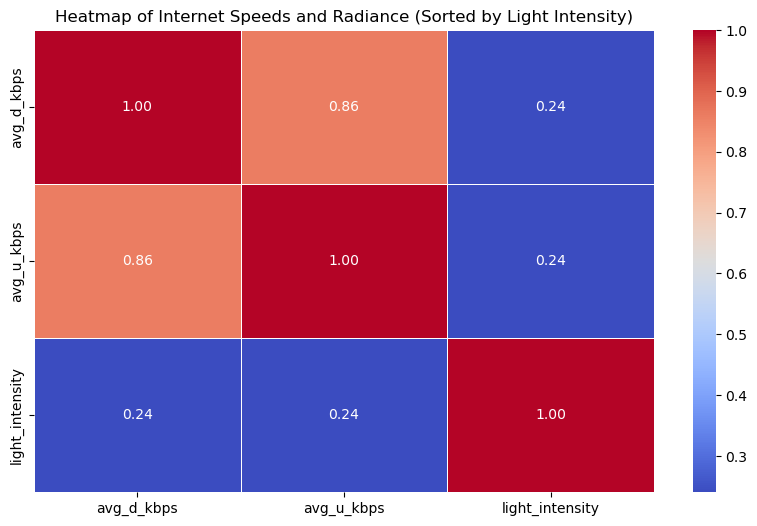

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the file path
data_path = 'enhanced_cleaned_data.csv'  # Path to the dataset

# Check if the file exists before loading
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
    print("Data loaded successfully.")
else:
    raise FileNotFoundError(f"The file at '{data_path}' does not exist.")

# Print the first few rows of the data
print("First few rows of the data:")
print(data.head())

# Check for the required columns
required_columns = ['avg_d_kbps', 'avg_u_kbps', 'light_intensity']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# Create a new dataframe for the heatmap with selected features
heatmap_data = data[['avg_d_kbps', 'avg_u_kbps', 'light_intensity']]

# If you want to display regions (rows) with high radiance values and internet speeds,
# you can sort by radiance and internet speed for better visualization
heatmap_data_sorted = heatmap_data.sort_values(by='light_intensity', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))

# Use seaborn heatmap to display correlation of light intensity with internet speeds
sns.heatmap(heatmap_data_sorted.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title("Heatmap of Internet Speeds and Radiance (Sorted by Light Intensity)")
plt.show()


Data loaded successfully.
First few rows of the data:
   longitude   latitude  light_intensity  \
0  56.308335  26.070833                0   
1  56.312502  26.070833                0   
2  56.316669  26.070833                0   
3  56.320835  26.070833                0   
4  56.308335  26.066666                0   

                                       geometry  index_right       quadkey  \
0       POINT (56.30833522380002 26.0708329419)      3285835  1.230000e+15   
1       POINT (56.31250189050002 26.0708329419)      3285836  1.230000e+15   
2      POINT (56.316668557200025 26.0708329419)      3285837  1.230000e+15   
3       POINT (56.32083522390002 26.0708329419)      3285837  1.230000e+15   
4  POINT (56.30833522380002 26.066666275200003)      3285835  1.230000e+15   

   avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       72710       28746          27      5        2   
1      119443       36785          24      9        2   
2      240717        8861          21    

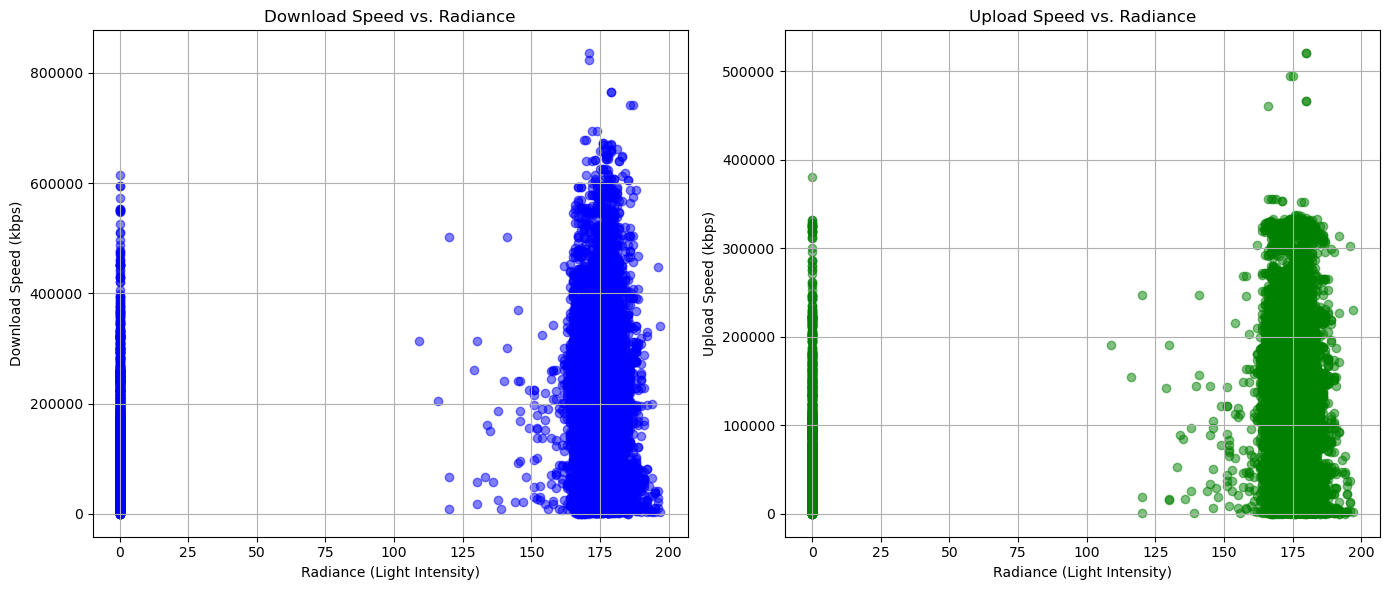

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the file path
data_path = 'enhanced_cleaned_data.csv'  # Path to the dataset

# Check if the file exists before loading
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
    print("Data loaded successfully.")
else:
    raise FileNotFoundError(f"The file at '{data_path}' does not exist.")

# Print the first few rows of the data
print("First few rows of the data:")
print(data.head())

# Check for the required columns
required_columns = ['avg_d_kbps', 'avg_u_kbps', 'light_intensity']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# Create scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for Download Speed vs. Radiance
plt.subplot(1, 2, 1)
plt.scatter(data['light_intensity'], data['avg_d_kbps'], color='blue', alpha=0.5)
plt.title('Download Speed vs. Radiance')
plt.xlabel('Radiance (Light Intensity)')
plt.ylabel('Download Speed (kbps)')
plt.grid(True)

# Scatter plot for Upload Speed vs. Radiance
plt.subplot(1, 2, 2)
plt.scatter(data['light_intensity'], data['avg_u_kbps'], color='green', alpha=0.5)
plt.title('Upload Speed vs. Radiance')
plt.xlabel('Radiance (Light Intensity)')
plt.ylabel('Upload Speed (kbps)')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Data loaded successfully.
First few rows of the data:
   longitude   latitude  light_intensity  \
0  56.308335  26.070833                0   
1  56.312502  26.070833                0   
2  56.316669  26.070833                0   
3  56.320835  26.070833                0   
4  56.308335  26.066666                0   

                                       geometry  index_right       quadkey  \
0       POINT (56.30833522380002 26.0708329419)      3285835  1.230000e+15   
1       POINT (56.31250189050002 26.0708329419)      3285836  1.230000e+15   
2      POINT (56.316668557200025 26.0708329419)      3285837  1.230000e+15   
3       POINT (56.32083522390002 26.0708329419)      3285837  1.230000e+15   
4  POINT (56.30833522380002 26.066666275200003)      3285835  1.230000e+15   

   avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       72710       28746          27      5        2   
1      119443       36785          24      9        2   
2      240717        8861          21    

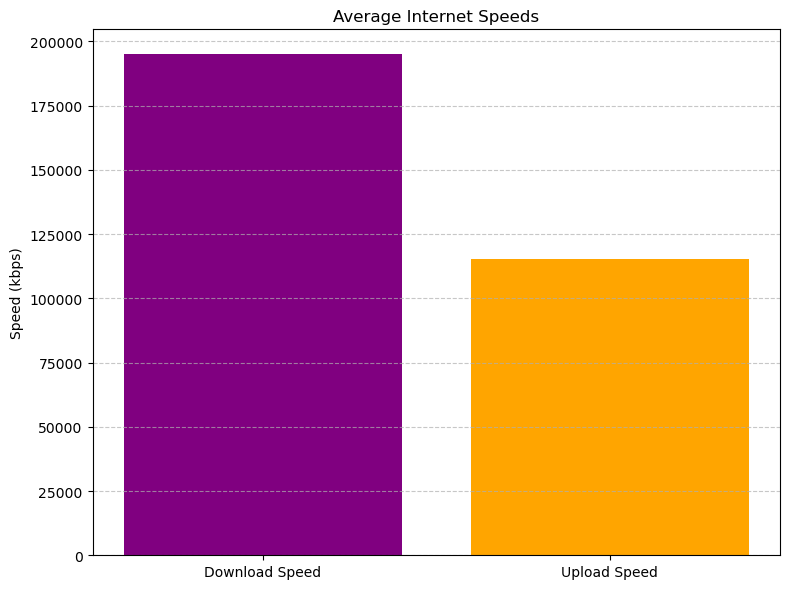

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the file path
data_path = 'enhanced_cleaned_data.csv'  # Path to the dataset

# Check if the file exists before loading
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
    print("Data loaded successfully.")
else:
    raise FileNotFoundError(f"The file at '{data_path}' does not exist.")

# Print the first few rows of the data to inspect
print("First few rows of the data:")
print(data.head())

# Check for the required columns
required_columns = ['avg_d_kbps', 'avg_u_kbps']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# Calculate overall mean values for download and upload speeds
avg_download_speed = data['avg_d_kbps'].mean()
avg_upload_speed = data['avg_u_kbps'].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Bar chart for overall averages with updated colors
plt.bar(['Download Speed', 'Upload Speed'], [avg_download_speed, avg_upload_speed], color=['purple', 'orange'])

# Adding labels and title
plt.title('Average Internet Speeds')
plt.ylabel('Speed (kbps)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Smart city regions file not found. Creating a simple example region...


C:\Users\shaho\AppData\Local\Temp\ipykernel_4836\2652085753.py:51: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Categories', loc='upper left')


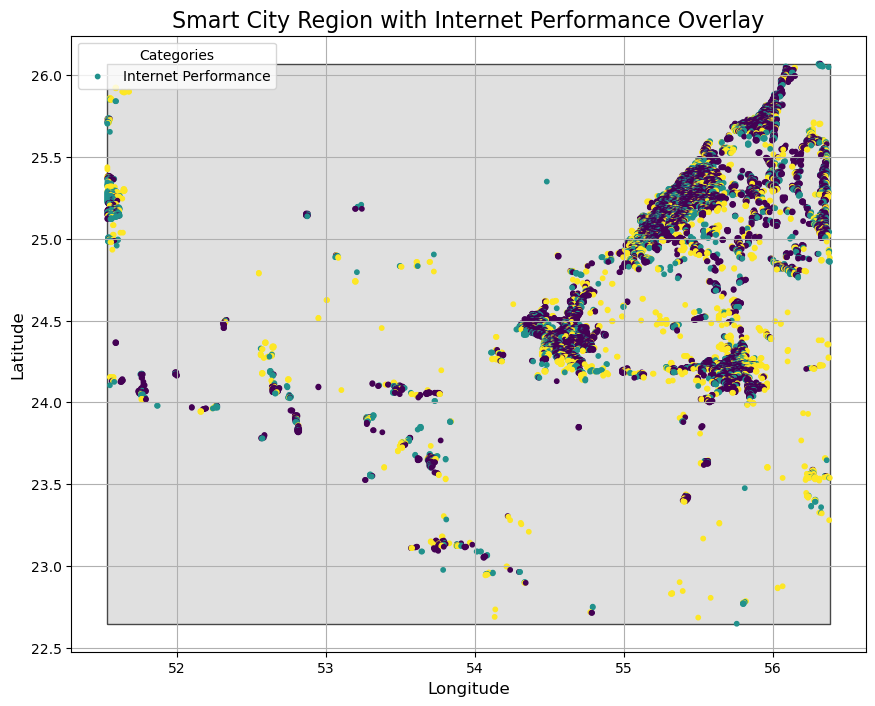

In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# Load the dataset with internet performance metrics
data_path = 'enhanced_cleaned_data.csv'  # Path to the dataset
data = pd.read_csv(data_path)

# Convert the dataset to a GeoDataFrame
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_data = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")  # Set CRS to WGS84

# Create a fallback rectangular region based on dataset bounds
print("Smart city regions file not found. Creating a simple example region...")
example_region = Polygon([
    (data['longitude'].min(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].min()),
])
regions_gdf = gpd.GeoDataFrame({'geometry': [example_region]}, crs="EPSG:4326")

# Ensure both GeoDataFrames are in the same CRS
if gdf_data.crs != regions_gdf.crs:
    gdf_data = gdf_data.to_crs(regions_gdf.crs)

# Plot the overlay
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the smart city regions
regions_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7, label='Smart City Region')

# Plot the internet performance data
# Example: Use avg_d_kbps_category for color-coding
gdf_data.plot(
    ax=ax,
    column='avg_d_kbps_category',
    categorical=True,
    legend=True,
    markersize=10,
    cmap='viridis',
    label='Internet Performance'
)

# Add titles and labels
plt.title('Smart City Region with Internet Performance Overlay', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Categories', loc='upper left')
plt.grid(True)

# Save or show the map
plt.savefig('smart_city_overlay.png', dpi=300, bbox_inches='tight')
plt.show()


Data loaded successfully.
First few rows of the data:
   longitude   latitude  light_intensity  \
0  56.308335  26.070833                0   
1  56.312502  26.070833                0   
2  56.316669  26.070833                0   
3  56.320835  26.070833                0   
4  56.308335  26.066666                0   

                                       geometry  index_right       quadkey  \
0       POINT (56.30833522380002 26.0708329419)      3285835  1.230000e+15   
1       POINT (56.31250189050002 26.0708329419)      3285836  1.230000e+15   
2      POINT (56.316668557200025 26.0708329419)      3285837  1.230000e+15   
3       POINT (56.32083522390002 26.0708329419)      3285837  1.230000e+15   
4  POINT (56.30833522380002 26.066666275200003)      3285835  1.230000e+15   

   avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       72710       28746          27      5        2   
1      119443       36785          24      9        2   
2      240717        8861          21    

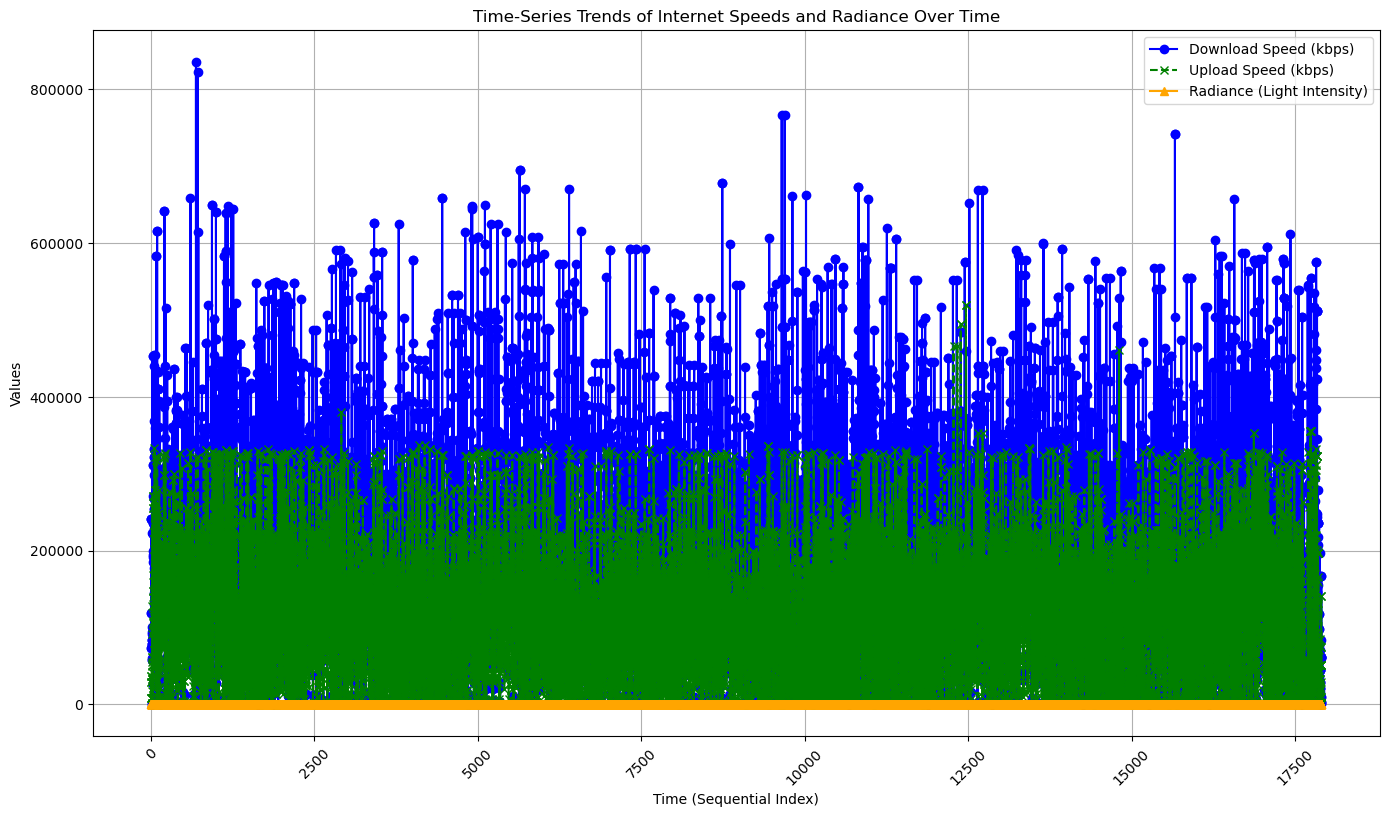

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the file path
data_path = 'enhanced_cleaned_data.csv'  # Path to the dataset

# Check if the file exists before loading
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
    print("Data loaded successfully.")
else:
    raise FileNotFoundError(f"The file at '{data_path}' does not exist.")

# Print the first few rows to inspect
print("First few rows of the data:")
print(data.head())

# Check for the required columns
required_columns = ['avg_d_kbps', 'avg_u_kbps', 'light_intensity']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# Create a sequential index as a time proxy (e.g., 0, 1, 2, ..., n)
data['time'] = range(len(data))

# Plotting trends over time
plt.figure(figsize=(14, 8))

# Plot Download Speed over Time
plt.plot(data['time'], data['avg_d_kbps'], label='Download Speed (kbps)', color='blue', linestyle='-', marker='o')

# Plot Upload Speed over Time
plt.plot(data['time'], data['avg_u_kbps'], label='Upload Speed (kbps)', color='green', linestyle='--', marker='x')

# Plot Radiance over Time
plt.plot(data['time'], data['light_intensity'], label='Radiance (Light Intensity)', color='orange', linestyle='-', marker='^')

# Add labels, title, and legend
plt.title('Time-Series Trends of Internet Speeds and Radiance Over Time')
plt.xlabel('Time (Sequential Index)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [35]:
# Extract the relevant columns
light_intensity = df['light_intensity']
avg_d_kbps = df['avg_d_kbps']

# Perform Pearson's correlation test
correlation_coefficient, p_value = pearsonr(light_intensity, avg_d_kbps)

correlation_coefficient, p_value

(0.24053944577462968, 4.6298483821009025e-234)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target variable
features = df[['light_intensity']]  # Add more features if necessary
target = df['avg_d_kbps']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(13315980880.643246, 0.07728021109416494)


Descriptive Statistics:
       light_intensity     avg_d_kbps     avg_u_kbps
count     17907.000000   17907.000000   17907.000000
mean        155.454962  194941.583347  115122.659295
std          55.465312  121020.109832   75004.043530
min           0.000000     133.000000       1.000000
25%         169.000000   95343.500000   53094.500000
50%         175.000000  199016.000000  115013.000000
75%         178.000000  264050.500000  161622.000000
max         197.000000  835217.000000  519990.000000


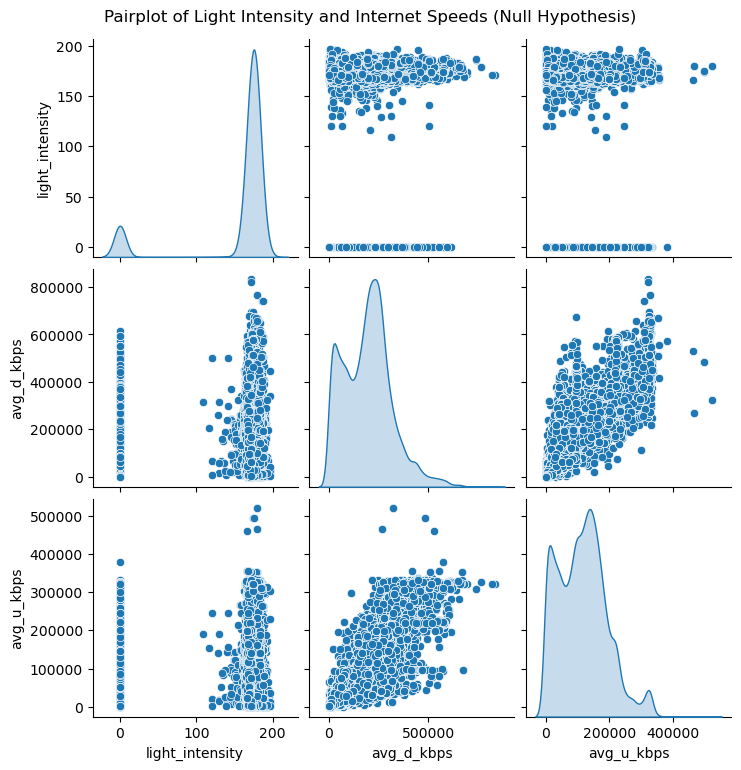

In [37]:
#Null Hypothesis
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data with valid values for hypothesis testing
filtered_data = df.dropna(subset=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])

# Descriptive statistics for relevant variables
print("\nDescriptive Statistics:")
print(filtered_data[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']].describe())

# Visualizations for the Null Hypothesis
sns.pairplot(filtered_data[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']], diag_kind='kde')
plt.suptitle("Pairplot of Light Intensity and Internet Speeds (Null Hypothesis)", y=1.02)
plt.show()

# Hypothesis testing using Spearman correlation
correlation_download, p_value_download = spearmanr(filtered_data['light_intensity'], filtered_data['avg_d_kbps'])
correlation_upload, p_value_upload = spearmanr(filtered_data['light_intensity'], filtered_data['avg_u_kbps'])



Spearman Correlation Results:
Light Intensity vs. Download Speed: Correlation = 0.11, P-value = 0.00000
Light Intensity vs. Upload Speed: Correlation = 0.11, P-value = 0.00000
Alternative Hypothesis Accepted: Significant correlation between light intensity and download speeds.
Alternative Hypothesis Accepted: Significant correlation between light intensity and upload speeds.


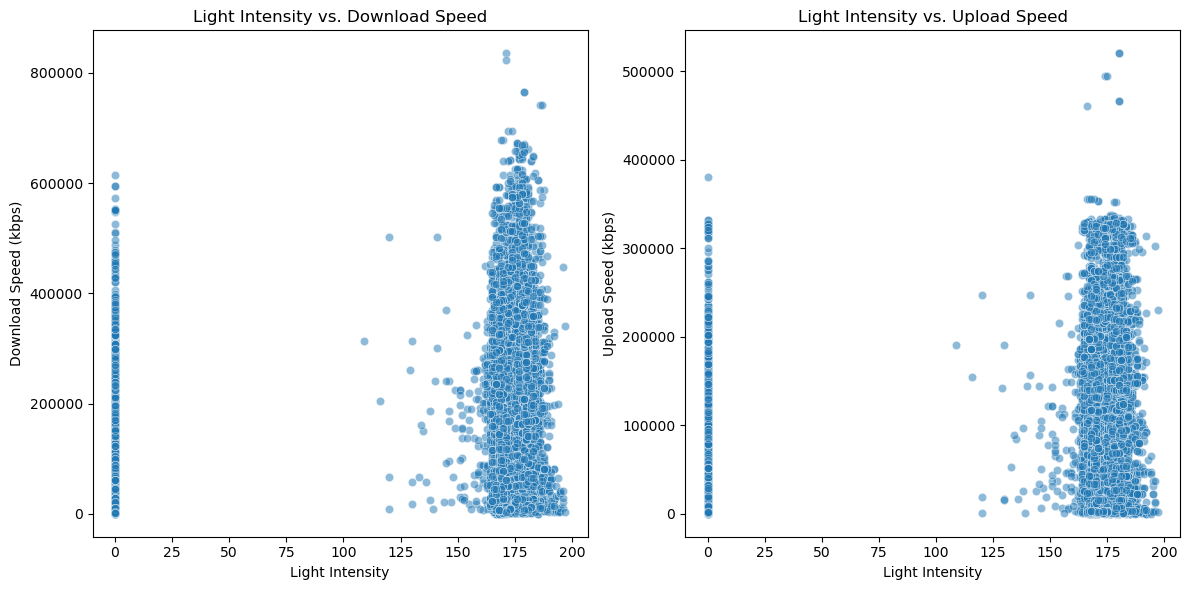

In [38]:
#Alternative Hypothesis
# Display results
print("\nSpearman Correlation Results:")
print(f"Light Intensity vs. Download Speed: Correlation = {correlation_download:.2f}, P-value = {p_value_download:.5f}")
print(f"Light Intensity vs. Upload Speed: Correlation = {correlation_upload:.2f}, P-value = {p_value_upload:.5f}")

# Interpretation for the Alternative Hypothesis
if p_value_download < 0.05:
    print("Alternative Hypothesis Accepted: Significant correlation between light intensity and download speeds.")
else:
    print("Alternative Hypothesis Rejected: No significant correlation between light intensity and download speeds.")

if p_value_upload < 0.05:
    print("Alternative Hypothesis Accepted: Significant correlation between light intensity and upload speeds.")
else:
    print("Alternative Hypothesis Rejected: No significant correlation between light intensity and upload speeds.")

# Additional visualizations for the Alternative Hypothesis
plt.figure(figsize=(12, 6))

# Scatterplot for Light Intensity vs Download Speed
plt.subplot(1, 2, 1)
sns.scatterplot(x='light_intensity', y='avg_d_kbps', data=filtered_data, alpha=0.5)
plt.title("Light Intensity vs. Download Speed")
plt.xlabel("Light Intensity")
plt.ylabel("Download Speed (kbps)")

# Scatterplot for Light Intensity vs Upload Speed
plt.subplot(1, 2, 2)
sns.scatterplot(x='light_intensity', y='avg_u_kbps', data=filtered_data, alpha=0.5)
plt.title("Light Intensity vs. Upload Speed")
plt.xlabel("Light Intensity")
plt.ylabel("Upload Speed (kbps)")

plt.tight_layout()
plt.show()


Train RMSE: 5094.40
Test RMSE: 7169.35
Train R²: 0.6081
Test R²: 0.2332
Cross-Validation R²: -0.6691 ± 1.0911


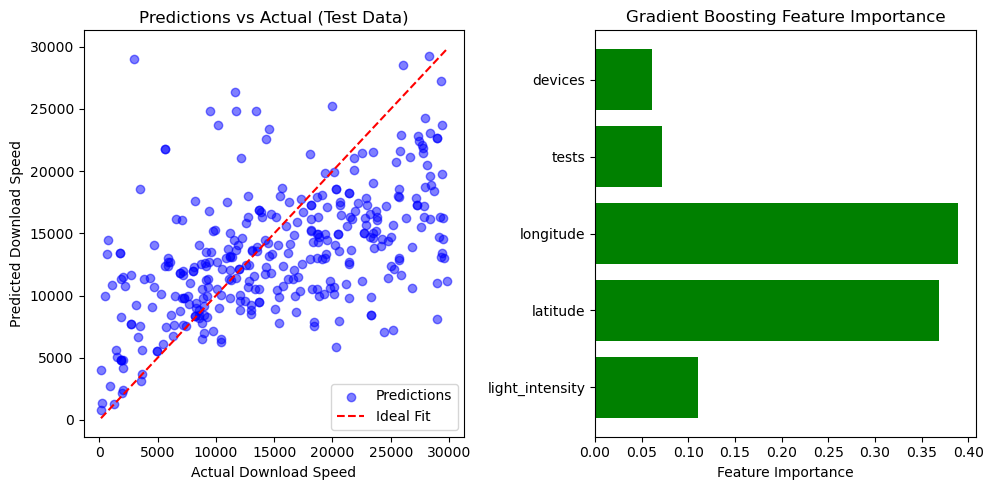

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('enhanced_cleaned_data.csv')

# Filter necessary columns and remove outliers
filtered_data = data[['light_intensity', 'avg_d_kbps', 'latitude', 'longitude', 'tests', 'devices']]
filtered_data = filtered_data[filtered_data['avg_d_kbps'] <= 30000]  # Restrict target values to ≤ 30,000

# Define features and target
X = filtered_data[['light_intensity', 'latitude', 'longitude', 'tests', 'devices']]
y = filtered_data['avg_d_kbps']

# Apply log transformation to the target
log_transformer = FunctionTransformer(np.log1p, validate=True)
y_log = log_transformer.transform(y.values.reshape(-1, 1)).flatten()

# Split data into train and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model pipeline: Gradient Boosting with Standard Scaling
pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.05, random_state=42)
)

# Train the model
pipeline.fit(X_train, y_train_log)

# Predictions and inverse transform for evaluation
y_train_pred_log = pipeline.predict(X_train)
y_test_pred_log = pipeline.predict(X_test)
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train_actual = np.expm1(y_train_log)
y_test_actual = np.expm1(y_test_log)

# Evaluate RMSE and R²
train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

# Cross-validation for robust evaluation
cv_scores = cross_val_score(pipeline, X, y_log, cv=5, scoring='r2')

# Print results
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Train R²: {train_r2:.4f}')
print(f'Test R²: {test_r2:.4f}')
print(f'Cross-Validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Visualization: Predictions vs Actual for Test Data
plt.figure(figsize=(10, 5))

# Scatter plot: Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test_actual, y_test_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Download Speed")
plt.ylabel("Predicted Download Speed")
plt.title("Predictions vs Actual (Test Data)")
plt.legend()

# Feature Importance
gb_model = pipeline.named_steps['gradientboostingregressor']
feature_importance = gb_model.feature_importances_
feature_names = X.columns

plt.subplot(1, 2, 2)
plt.barh(feature_names, feature_importance, color='green')
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")

plt.tight_layout()
plt.show()
